<a href="https://colab.research.google.com/github/mehmetgul/AutoTraderDE/blob/main/K_means_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

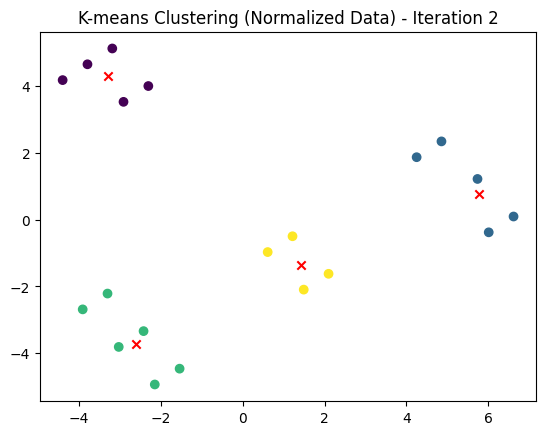

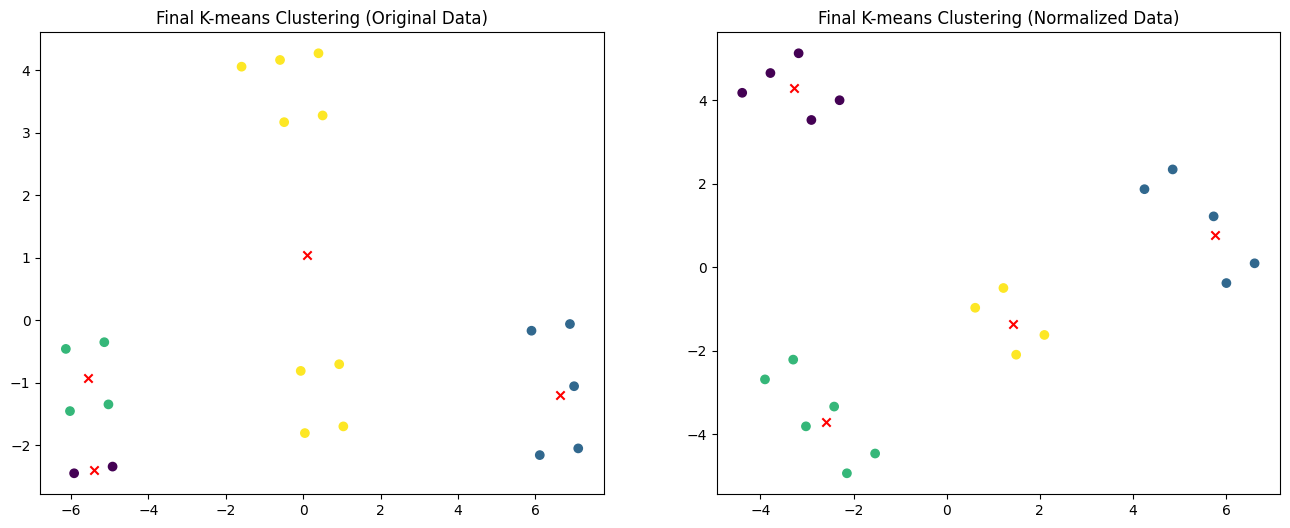

In [323]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

# Load and clean the kmtest dataset
kmtest = pd.read_csv("data/kmtest.csv")
kmtest_split = kmtest[kmtest.columns[0]].str.split(expand=True).applymap(lambda x: float(x.strip()))
data = kmtest_split.copy()
print(data.head())

# Function to calculate centroids randomly
def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample().iloc[0]))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

# Function to assign labels based on closest centroid
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

# Function to calculate new centroids based on the labels
def new_centroids(data, labels, k):
    centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids

# Function to plot the clusters with iterative updates
def plot_clusters_interactive(data, labels, centroids, iteration, title):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'{title} - Iteration {iteration}')
    plt.scatter(x=data_2d[:, 0], y=data_2d[:, 1], c=labels)
    plt.scatter(x=centroids_2d[:, 0], y=centroids_2d[:, 1], color='red', marker='x')
    plt.show()

# K-means clustering with iterative plotting
def run_kmeans_interactive(data, centroid_count=4, max_iterations=100, title="K-means Clustering"):
    centroids = random_centroids(data, centroid_count)
    old_centroids = pd.DataFrame()
    iteration = 0

    while iteration < max_iterations and not centroids.equals(old_centroids):
        old_centroids = centroids
        labels = get_labels(data, centroids)
        centroids = new_centroids(data, labels, centroid_count)
        plot_clusters_interactive(data, labels, centroids, iteration, title)
        iteration += 1

    return centroids, labels

# 1. Clustering on the original data with iterative plotting
print("Clustering on Original Data:")
original_centroids, original_labels = run_kmeans_interactive(data, title="K-means Clustering (Original Data)")

# 2. Normalize the data using custom normalization
data_normalized = ((data - data.min()) / (data.max() - data.min())) * 10 + 1

# 3. Clustering on the normalized data with iterative plotting
print("Clustering on Normalized Data:")
normalized_centroids, normalized_labels = run_kmeans_interactive(data_normalized, title="K-means Clustering (Normalized Data)")

# 4. Final comparison plots
plt.figure(figsize=(16, 6))

# Plot for original data clustering
plt.subplot(1, 2, 1)
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data)
centroids_2d = pca.transform(original_centroids.T)
plt.title("Final K-means Clustering (Original Data)")
plt.scatter(x=data_2d[:, 0], y=data_2d[:, 1], c=original_labels)
plt.scatter(x=centroids_2d[:, 0], y=centroids_2d[:, 1], color='red', marker='x')


# Plot for normalized data clustering
plt.subplot(1, 2, 2)
data_2d_norm = pca.fit_transform(data_normalized)
centroids_2d_norm = pca.transform(normalized_centroids.T)
plt.title("Final K-means Clustering (Normalized Data)")
plt.scatter(x=data_2d_norm[:, 0], y=data_2d_norm[:, 1], c=normalized_labels)
plt.scatter(x=centroids_2d_norm[:, 0], y=centroids_2d_norm[:, 1], color='red', marker='x')

plt.show()


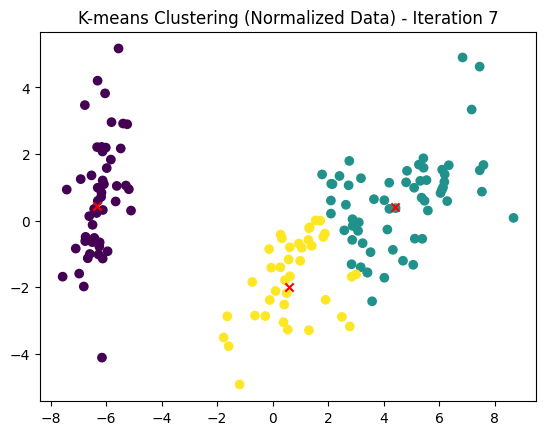

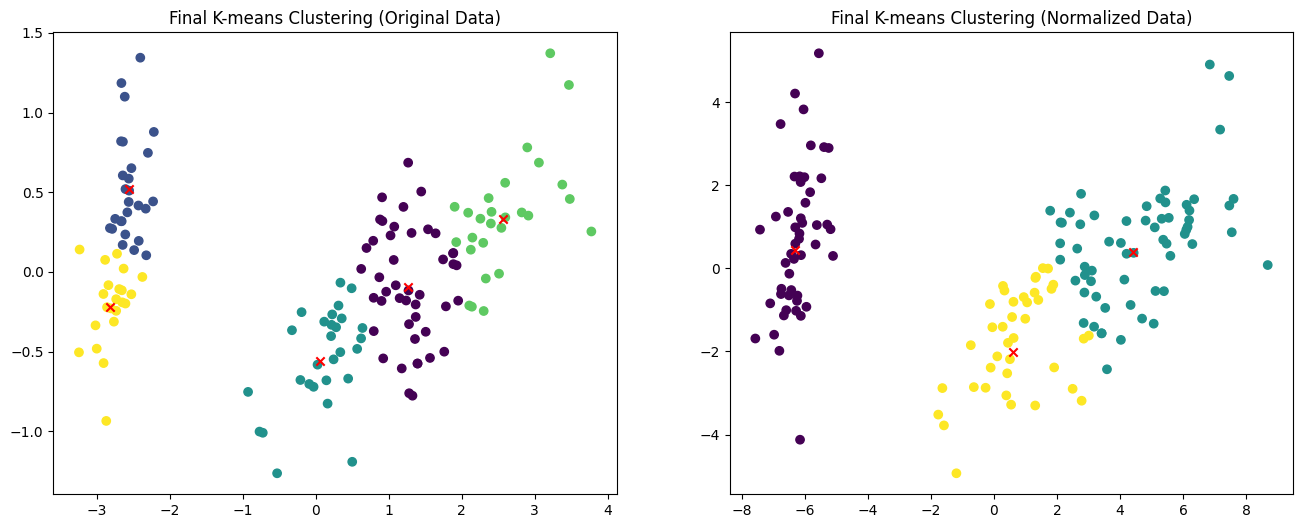

In [326]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

# Load the iris dataset
iris = pd.read_csv("data/iris.csv")
data = iris.iloc[:, :4].copy()

# Function to calculate centroids randomly
def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

# Function to assign labels based on closest centroid
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

# Function to calculate new centroids based on the labels
def new_centroids(data, labels, k):
    centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids

# Function to plot the clusters with iterative updates
def plot_clusters_interactive(data, labels, centroids, iteration, title):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'{title} - Iteration {iteration}')
    plt.scatter(x=data_2d[:, 0], y=data_2d[:, 1], c=labels)
    plt.scatter(x=centroids_2d[:, 0], y=centroids_2d[:, 1], color='red', marker='x')
    plt.show()

# K-means clustering with iterative plotting
def run_kmeans_interactive(data, centroid_count=5, max_iterations=100, title="K-means Clustering"):
    centroids = random_centroids(data, centroid_count)
    old_centroids = pd.DataFrame()
    iteration = 1

    while iteration < max_iterations and not centroids.equals(old_centroids):
        old_centroids = centroids
        labels = get_labels(data, centroids)
        centroids = new_centroids(data, labels, centroid_count)
        plot_clusters_interactive(data, labels, centroids, iteration, title)
        iteration += 1

    return centroids, labels

# 1. Clustering on the original data with iterative plotting
print("Clustering on Original Data:")
original_centroids, original_labels = run_kmeans_interactive(data, title="K-means Clustering (Original Data)")

# 2. Normalize the data using custom normalization
data_normalized = ((data - data.min()) / (data.max() - data.min())) * 10 + 1

# 3. Clustering on the normalized data with iterative plotting
print("Clustering on Normalized Data:")
normalized_centroids, normalized_labels = run_kmeans_interactive(data_normalized, title="K-means Clustering (Normalized Data)")

# 4. Final comparison plots
plt.figure(figsize=(16, 6))

# Plot for original data clustering
plt.subplot(1, 2, 1)
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data)
centroids_2d = pca.transform(original_centroids.T)
plt.title("Final K-means Clustering (Original Data)")
plt.scatter(x=data_2d[:, 0], y=data_2d[:, 1], c=original_labels)
plt.scatter(x=centroids_2d[:, 0], y=centroids_2d[:, 1], color='red', marker='x')

# Plot for normalized data clustering
plt.subplot(1, 2, 2)
data_2d_norm = pca.fit_transform(data_normalized)
centroids_2d_norm = pca.transform(normalized_centroids.T)
plt.title("Final K-means Clustering (Normalized Data)")
plt.scatter(x=data_2d_norm[:, 0], y=data_2d_norm[:, 1], c=normalized_labels)
plt.scatter(x=centroids_2d_norm[:, 0], y=centroids_2d_norm[:, 1], color='red', marker='x')

plt.show()


